# Pairs Trading Project

In this project, we have tried to reduce one of our most complex trading problems to a fairly simple form. 

Ultimately, you will get to work with real market data, identify patterns and then come up with a trading strategy.

### The Problem

A trader has noticed a correlation between the instruments X and Y, and thinks we could make money by trading them when the prices diverge too much. Your job is to explore this opportunity and evaluate whether such a strategy could work.

The above statement is intentionally reductive and Optiver typically seeks to embded such strategies in our market making activities. Our goal, overall, is to provide liquidity to markets, but understanding the structure and correlation of the instruments we trade enables us to do so profitably.

### The Data

Here we import some useful Python packages and bring in the data.

In [1]:
import math
import pandas as pd
import numpy as np

# read the csv of data into a pandas dataframe
df = pd.read_csv('final_data_10s.csv')

In [2]:
df

,Time,X_BID,X_BID_VOL,X_ASK,X_ASK_VOL,Y_BID,Y_BID_VOL,Y_ASK,Y_ASK_VOL
0,2019-11-18 08:00:00,106340.0,15.0,106348.0,11.0,105200.0,9.0,105210.0,19.0
1,2019-11-18 08:00:10,106312.0,6.0,106320.0,9.0,105180.0,5.0,105190.0,13.0
2,2019-11-18 08:00:20,106312.0,7.0,106320.0,12.0,105170.0,32.0,105180.0,1.0
3,2019-11-18 08:00:30,106336.0,22.0,106340.0,1.0,105190.0,10.0,105200.0,19.0
4,2019-11-18 08:00:40,106352.0,2.0,106356.0,4.0,105200.0,29.0,105220.0,24.0
...,...,...,...,...,...,...,...,...,...
737734,2020-12-31 09:59:20,109140.0,2.0,109144.0,1.0,107190.0,6.0,107210.0,1.0
737735,2020-12-31 09:59:30,109144.0,1.0,109168.0,21.0,107170.0,1.0,107200.0,1.0
737736,2020-12-31 09:59:40,109120.0,4.0,109144.0,1.0,107170.0,3.0,107230.0,3.0
737737,2020-12-31 09:59:50,109092.0,2.0,109104.0,5.0,107180.0,3.0,107220.0,5.0


There's a fair bit of data! Let's have a look at some high level properties of this dataframe.

In [3]:
df.shape

(737739, 9)

In [4]:
df.columns

Index(['Time', 'X_BID', 'X_BID_VOL', 'X_ASK', 'X_ASK_VOL', 'Y_BID',
       'Y_BID_VOL', 'Y_ASK', 'Y_ASK_VOL'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of                        Time     X_BID  X_BID_VOL     X_ASK  X_ASK_VOL  \
0       2019-11-18 08:00:00  106340.0       15.0  106348.0       11.0   
1       2019-11-18 08:00:10  106312.0        6.0  106320.0        9.0   
2       2019-11-18 08:00:20  106312.0        7.0  106320.0       12.0   
3       2019-11-18 08:00:30  106336.0       22.0  106340.0        1.0   
4       2019-11-18 08:00:40  106352.0        2.0  106356.0        4.0   
...                     ...       ...        ...       ...        ...   
737734  2020-12-31 09:59:20  109140.0        2.0  109144.0        1.0   
737735  2020-12-31 09:59:30  109144.0        1.0  109168.0       21.0   
737736  2020-12-31 09:59:40  109120.0        4.0  109144.0        1.0   
737737  2020-12-31 09:59:50  109092.0        2.0  109104.0        5.0   
737738  2020-12-31 10:00:00  109148.0        2.0  109164.0        1.0   

           Y_BID  Y_BID_VOL     Y_ASK  Y_ASK_VOL  
0       105200.0        9.0  105210.0   

### Some helpful notes on the data

For each of the two instruments X and Y, you are provided 10 second snapshots of the top level of the *market depth*.

The columns are specifically defined as follows:

* **BID** = the highest price at which someone in the market is willing to buy.
* **BID_VOL** = the total number of contracts that are willing to buy at price BID.
* **ASK** = the lowest price at which someone in the market is willing to sell.
* **ASK_VOL** = total number of contracts that are willing to sell at price ASK.

Note that this means that if you wish to sell right at a particular timestamp, the best price you can sell against is **BID**, and the number of contracts you can sell is **BID_VOL**, since in total all participants are willing to buy **BID_VOL** contracts at price **BID**.

Note that whilst the market is open, **ASK** must be strictly **> BID** for otherwise a trade execution would occur.

We do not include a list of *trade executions* in this dataset.

### The Objective

Your goals are:

**Dataset Exploration**
* Explore the dataset and present the findings (e.g. anomalies, correlations, periodic patterns).

**Pricing Relationships**
* Identify potential pricing signals based on the relationships/patterns discovered in the previous step.
* Develop and test whether these signals are a good predictor of future.

**Trading Strategy**
* Based on your findings above, describe how you would monetise the opportunity.
* Describe metrics you can use to measure performance of the strategy.
* Plot the profit of your trading strategy over time.
* Highlight limitations of the signals and strategy.
* Provide potential areas for further research.

### Some Notes

* You are able to take long or short positions on X and Y.
* The units of all prices are listed in AUD.
* The units of all volumes are in number of contracts. This means that if you sell 2 contracts at price 100100, and buy them back at price 100000, your profit is 200 AUD.
* X and Y, like many financial instruments, do *not* trade 24 hours a day, nor 7 days a week.
* There are a lot of pair trading examples available online, (e.g. https://github.com/KidQuant/Pairs-Trading-With-Python/blob/master/PairsTrading.ipynb). While useful as a simple starting point, we stress that these examples don’t consider the intricacies of the dataset used in the project. 
* If you use a statistical library (e.g. to test for co-integration) then make sure you understand how the procedure works and why you chose to use it. Don’t simply copy code found online. 

# Project Work

In [3]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

#### Since I don't have multiple models, I don't need a validation set to select the model, here I just use training set and 
# a final set for testing the strategy.

In [22]:
# Convert the 'Time' column to datetime

def time_sort(df):
    df['Time'] = pd.to_datetime(df['Time'])
    return df
train_df = time_sort(train_df)
test_df = time_sort(test_df)

/tmp/ipykernel_3381630/1334226870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'])


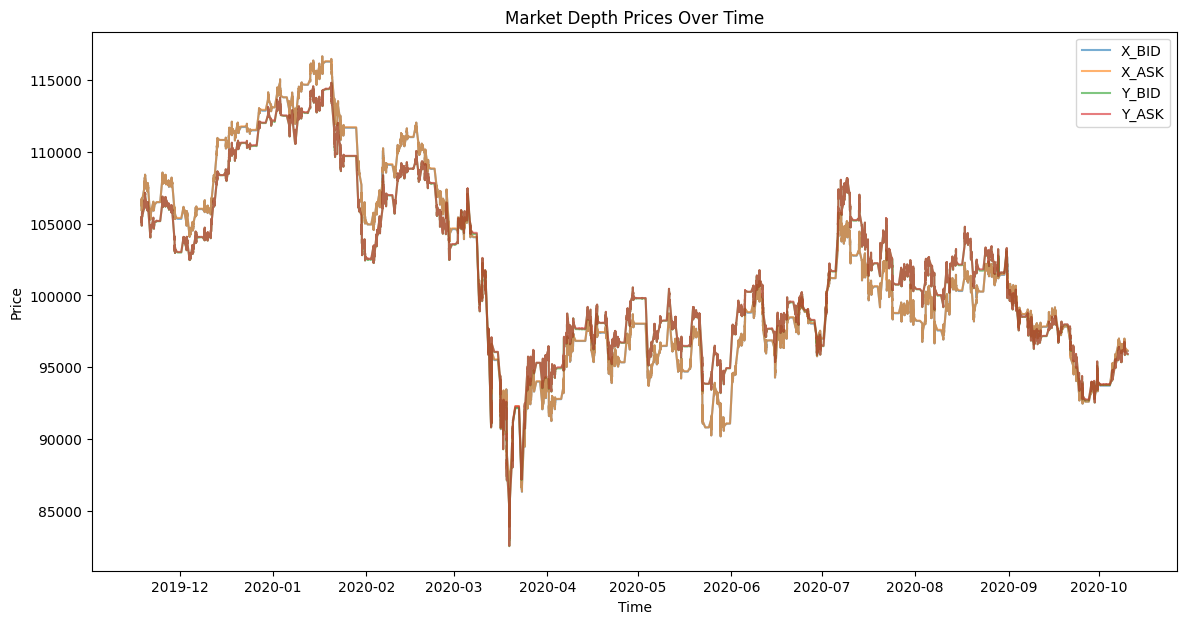

In [23]:
import matplotlib.pyplot as plt

def plot(df):
    # Plot time series of BID and ASK prices for both instruments
    plt.figure(figsize=(14, 7))
    plt.plot(df['Time'], df['X_BID'], label='X_BID', alpha=0.6)
    plt.plot(df['Time'], df['X_ASK'], label='X_ASK', alpha=0.6)
    plt.plot(df['Time'], df['Y_BID'], label='Y_BID', alpha=0.6)
    plt.plot(df['Time'], df['Y_ASK'], label='Y_ASK', alpha=0.6)
    plt.legend()
    plt.title('Market Depth Prices Over Time')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()
    return 
plot(train_df)

X and Y are closely correlated with each other, and we can exploit this relationship to make profit.

#### From my understanding, the basic idea is:
 Since we know they are highly correlated, once there's a divergence, we will know they will converge together, their lines will meet. Suppose stock X and stock Y are cointegrated. If stock X's price rises significantly while stock Y's price does not, a trader might short stock X and buy stock Y, expecting their prices to move back into alignment.

First find some basic potential pricing signals: Based on my quick literature review, we can use z-score and spread

$$ \text{Bid-Ask Spread} = \text{Ask Price} - \text{Bid Price} $$

$$ \text{Mid Price} = \frac{\text{Bid Price} + \text{Ask Price}}{2}$$


$$ \text{Z-Score} = \frac{\text{Current Spread} - \text{Mean Spread}}{\text{Standard Deviation of Spread}} $$

A positive z-score means the current spread is above the historical mean, indicating that one asset is relatively more expensive compared to the other.

A negative z-score means the current spread is below the historical mean, indicating that one asset is relatively cheaper compared to the other.

In [5]:
from statsmodels.tsa.stattools import coint
from sklearn.linear_model import LinearRegression


def rolling_coint(df, window):
    rolling_coint_values = []
    for i in range(window, len(df)):
        coint_value = coint(df['X_MID'].iloc[i-window:i], df['Y_MID'].iloc[i-window:i])[1]
        rolling_coint_values.append(coint_value)
    return [np.nan]*window + rolling_coint_values


# rolling hedge ratio using Linear Regression
def rolling_hedge_ratio(df, window):
    rolling_beta = []
    for i in range(window, len(df)):
        model = LinearRegression().fit(df['Y_MID'].iloc[i-window:i].values.reshape(-1, 1), df['X_MID'].iloc[i-window:i].values)
        rolling_beta.append(model.coef_[0])
    return [np.nan]*window + rolling_beta


def get_trading_signals(df, window = 252):
    # Calculate Mid Prices
    df['X_MID'] = (df['X_BID'] + df['X_ASK']) / 2
    df['Y_MID'] = (df['Y_BID'] + df['Y_ASK']) / 2
    
    df['rolling_corr'] = df['X_MID'].rolling(window).corr(df['Y_MID'])

    df['rolling_coint'] = rolling_coint(df, window)

    # Calculate rolling mean and standard deviation of the spread
    df['spread_mean'] = df['spread'].rolling(window).mean()
    df['spread_std'] = df['spread'].rolling(window).std()
    df['z_score'] = (df['spread'] - df['spread_mean']) / df['spread_std']
    
    #### dynamic hedging ratio
    df['hedge_ratio'] = rolling_hedge_ratio(df, window)
    df['spread'] = df['X_MID'] - df['hedge_ratio'] * df['Y_MID']

    # Calculate rolling mean and standard deviation of the spread
    df['spread_mean'] = df['spread'].rolling(window).mean()
    df['spread_std'] = df['spread'].rolling(window).std()
    df['z_score'] = (df['spread'] - df['spread_mean']) / df['spread_std']

    return df
train_df_full = get_trading_signals(train_df)
train_df_full

/tmp/ipykernel_122019/325609655.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X_MID'] = (df['X_BID'] + df['X_ASK']) / 2
/tmp/ipykernel_122019/325609655.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_MID'] = (df['Y_BID'] + df['Y_ASK']) / 2
/tmp/ipykernel_122019/325609655.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

ValueError: Invalid input, x is constant

In [31]:
train_df

,Time,X_BID,X_BID_VOL,X_ASK,X_ASK_VOL,Y_BID,Y_BID_VOL,Y_ASK,Y_ASK_VOL,X_MID,Y_MID,spread,z_score,rolling_corr,spread_mean,spread_std
0,2019-11-18 08:00:00,106340.0,15.0,106348.0,11.0,105200.0,9.0,105210.0,19.0,106344.0,105205.0,1139.0,NaN,NaN,NaN,NaN
1,2019-11-18 08:00:10,106312.0,6.0,106320.0,9.0,105180.0,5.0,105190.0,13.0,106316.0,105185.0,1131.0,NaN,NaN,NaN,NaN
2,2019-11-18 08:00:20,106312.0,7.0,106320.0,12.0,105170.0,32.0,105180.0,1.0,106316.0,105175.0,1141.0,NaN,NaN,NaN,NaN
3,2019-11-18 08:00:30,106336.0,22.0,106340.0,1.0,105190.0,10.0,105200.0,19.0,106338.0,105195.0,1143.0,NaN,NaN,NaN,NaN
4,2019-11-18 08:00:40,106352.0,2.0,106356.0,4.0,105200.0,29.0,105220.0,24.0,106354.0,105210.0,1144.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590186,2020-10-10 11:35:10,96132.0,4.0,96156.0,3.0,95900.0,1.0,95930.0,2.0,96144.0,95915.0,229.0,NaN,NaN,229.0,0.0
590187,2020-10-10 11:35:20,96132.0,4.0,96156.0,3.0,95900.0,1.0,95930.0,2.0,96144.0,95915.0,229.0,NaN,NaN,229.0,0.0
590188,2020-10-10 11:35:30,96132.0,4.0,96156.0,3.0,95900.0,1.0,95930.0,2.0,96144.0,95915.0,229.0,NaN,NaN,229.0,0.0
590189,2020-10-10 11:35:40,96132.0,4.0,96156.0,3.0,95900.0,1.0,95930.0,2.0,96144.0,95915.0,229.0,NaN,NaN,229.0,0.0


The market is dynamic, their correlations may vary, so we use moving window average to take into the recent info.

Given these signals, since we are making money based on the diveregence of the correlated instrument, we are making trading decisions based on the spread (divergence)

In [4]:
# Define adaptive trading strategy
def adaptive_trading_strategy(df, entry_threshold=2, exit_threshold=0.5):
    df['position_X'] = 0
    df['position_Y'] = 0

    # Enter positions based on Z-score
    df.loc[df['z_score'] > entry_threshold, 'position_X'] = -1  # Short X
    df.loc[df['z_score'] > entry_threshold, 'position_Y'] = df['hedge_ratio']  # Long Y

    df.loc[df['z_score'] < -entry_threshold, 'position_X'] = 1  # Long X
    df.loc[df['z_score'] < -entry_threshold, 'position_Y'] = -df['hedge_ratio']  # Short Y

    # Exit positions when Z-score reverts to mean
    df.loc[df['z_score'].abs() < exit_threshold, ['position_X', 'position_Y']] = 0

    df['position_X'] = df['position_X'].shift()
    df['position_Y'] = df['position_Y'].shift()

    return df

df = adaptive_trading_strategy(train_df)


/tmp/ipykernel_122019/3819801548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position_X'] = 0
/tmp/ipykernel_122019/3819801548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position_Y'] = 0


KeyError: 'z_score'

After we got the features of these, we can determins the  entry threshold and exit threshold, through optimization, 
And this will be our trading strategy.

In [ ]:
# Calculate returns
df['returns_X'] = df['position_X'] * df['X_MID'].pct_change()
df['returns_Y'] = df['position_Y'] * df['Y_MID'].pct_change()
df['returns'] = df['returns_X'] + df['returns_Y']

# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df['Time'], df['cumulative_returns'], label='Cumulative Returns', alpha=0.6)
plt.title('Cumulative Returns from Adaptive Pairs Trading Strategy')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Performance metrics
cumulative_return = df['cumulative_returns'].iloc[-1] - 1
max_drawdown = (df['cumulative_returns'].cummax() - df['cumulative_returns']).max()
sharpe_ratio = df['returns'].mean() / df['returns'].std() * np.sqrt(252)

print(f'Cumulative Return: {cumulative_return:.2%}')
print(f'Max Drawdown: {max_drawdown:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

In [ ]:
# Calculate returns
df['returns_X'] = df['position_X'] * df['X_MID'].pct_change()
df['returns_Y'] = df['position_Y'] * df['Y_MID'].pct_change()
df['returns'] = df['returns_X'] + df['returns_Y']

# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df['Time'], df['cumulative_returns'], label='Cumulative Returns', alpha=0.6)
plt.title('Cumulative Returns from Adaptive Pairs Trading Strategy')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Performance metrics
cumulative_return = df['cumulative_returns'].iloc[-1] - 1
max_drawdown = (df['cumulative_returns'].cummax() - df['cumulative_returns']).max()
sharpe_ratio = df['returns'].mean() / df['returns'].std() * np.sqrt(252)

print(f'Cumulative Return: {cumulative_return:.2%}')
print(f'Max Drawdown: {max_drawdown:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')


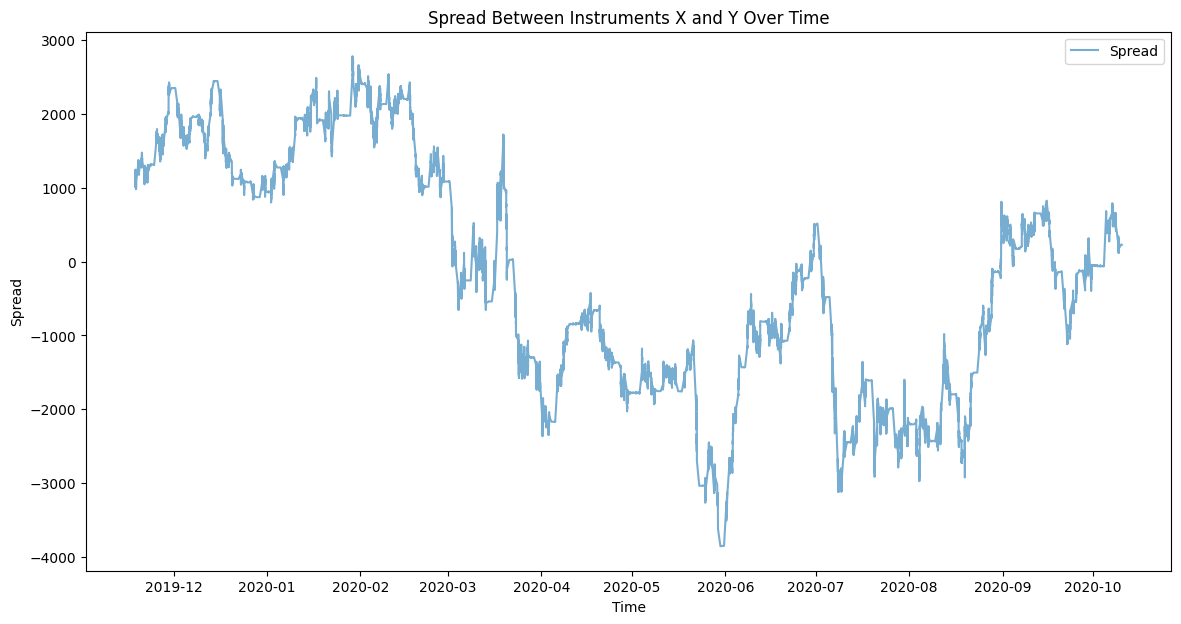

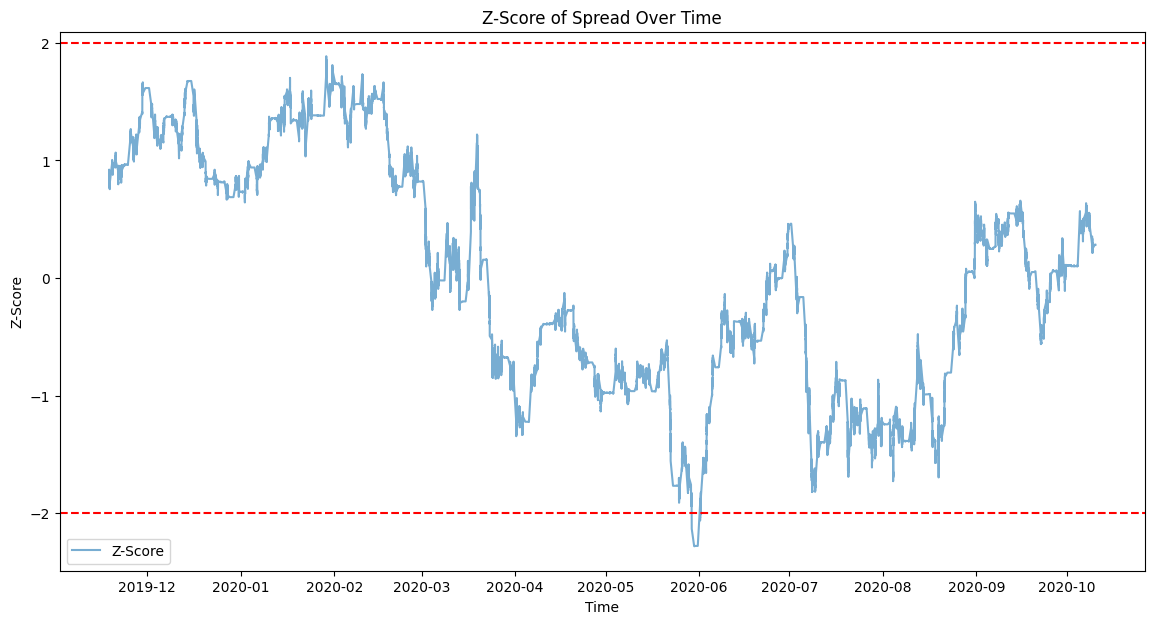

In [18]:
def spread_zscore_plot(df):
    # Plot the spread and Z-score
    plt.figure(figsize=(14, 7))
    plt.plot(df['Time'], df['spread'], label='Spread', alpha=0.6)
    plt.title('Spread Between Instruments X and Y Over Time')
    plt.xlabel('Time')
    plt.ylabel('Spread')
    plt.legend()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(df['Time'], df['z_score'], label='Z-Score', alpha=0.6)
    plt.axhline(2, color='red', linestyle='--')
    plt.axhline(-2, color='red', linestyle='--')
    plt.title('Z-Score of Spread Over Time')
    plt.xlabel('Time')
    plt.ylabel('Z-Score')
    plt.legend()
    plt.show()
    return 
spread_zscore_plot(train_df_mid)

## Spread Analysis
1. Mean Reversion: The spread appears to exhibit mean-reverting behavior, which is a desirable property for pairs trading. This means that the prices of the two instruments move together over time, and deviations from the mean spread tend to correct themselves.
2. Volatility: The spread shows periods of higher volatility, especially around mid-2020. This could be due to market events or changes in the underlying relationship between the two instruments.
3. Directional Trends: The spread has directional trends where it moves consistently upwards or downwards. Identifying these trends can help in adjusting the trading strategy to avoid getting caught in one side of a mean reversion trade during a trending period.

Based on the Z-score of the spread, we can define a pairs trading strategy.

In [17]:
def trading_strategy(df, entry_threshold=2, exit_threshold=0.5):
    df['position_X'] = 0
    df['position_Y'] = 0

    # Enter positions based on Z-score
    df.loc[df['z_score'] > entry_threshold, 'position_X'] = -1  # Short X
    df.loc[df['z_score'] > entry_threshold, 'position_Y'] = 1   # Long Y

    df.loc[df['z_score'] < -entry_threshold, 'position_X'] = 1  # Long X
    df.loc[df['z_score'] < -entry_threshold, 'position_Y'] = -1 # Short Y

    # Exit positions when Z-score reverts to mean
    df.loc[df['z_score'].abs() < exit_threshold, ['position_X', 'position_Y']] = 0

    df['position_X'] = df['position_X'].shift()
    df['position_Y'] = df['position_Y'].shift()

    return df

df = trading_strategy(df)

# Calculate returns
df['returns_X'] = df['position_X'] * df['X_MID'].pct_change()
df['returns_Y'] = df['position_Y'] * df['Y_MID'].pct_change()
df['returns'] = df['returns_X'] + df['returns_Y']

# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df['Time'], df['cumulative_returns'], label='Cumulative Returns', alpha=0.6)
plt.title('Cumulative Returns from Pairs Trading Strategy')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


KeyError: 'z_score'

In [17]:
# Model the Spread
def get_the_spread(df):
    spread = df['X_MID'] - df['Y_MID']
    return spread
spread_train = get_the_spread(train_df_mid)
spread_train

0         1139.0
1         1131.0
2         1141.0
3         1143.0
4         1144.0
           ...  
590186     229.0
590187     229.0
590188     229.0
590189     229.0
590190     229.0
Length: 590191, dtype: float64

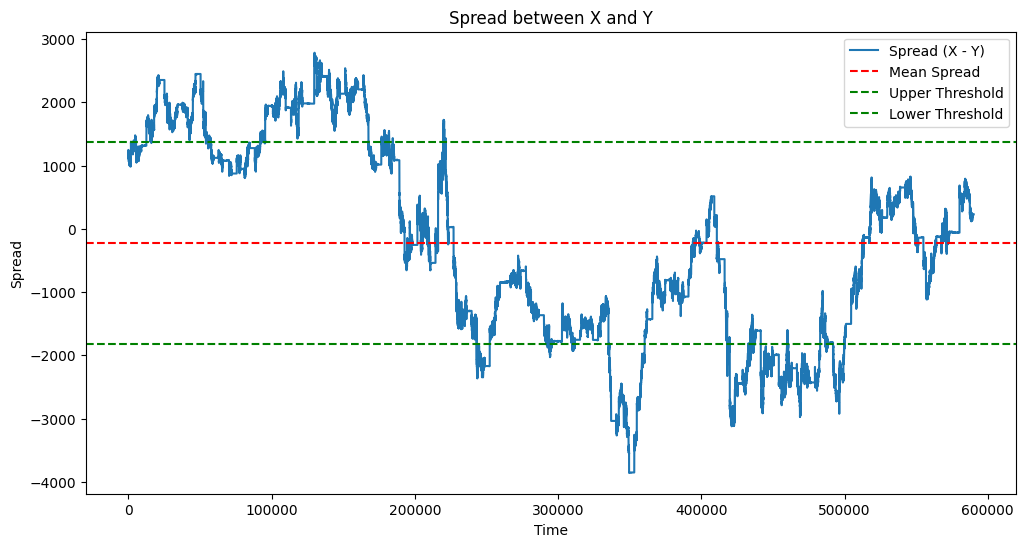

In [18]:

def plot_spread(spread):
    # Plotting the spread
    plt.figure(figsize=(12, 6))
    plt.plot(spread, label='Spread (X - Y)')
    plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean Spread')
    plt.axhline(spread.mean() + spread.std(), color='green', linestyle='--', label='Upper Threshold')
    plt.axhline(spread.mean() - spread.std(), color='green', linestyle='--', label='Lower Threshold')
    plt.legend()
    plt.title('Spread between X and Y')
    plt.xlabel('Time')
    plt.ylabel('Spread')
    plt.show()
    return
plot_spread(spread_train)

In [19]:
def get_mean_std(spread):
    mean_spread = spread.mean()
    std_spread = spread.std()
    return mean_spread, std_spread
get_mean_std(spread_train)

(-222.16731363236647, 1594.1165225144935)

In [11]:
# Convert the 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Sort the dataframe by the 'Time' column
df_sorted = df.sort_values(by='Time')
df_sorted.reset_index(drop=True, inplace=True)

# Conclusions and Insights

# Your Trading Strategy